In [ ]:
#dependancies
import numpy as np
import pandas as pd
from os import path
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#define Data Pre-Processing
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [WordNetLemmatizer().lemmatize(token) for token in tokens if token.isalpha()]
    return " ".join(tokens)

with open('tfidf_vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

#import Data and apply pre-processing
df_survey = pd.read_csv('/content/survey.csv')
df_survey['text'] = df_survey['text'].astype(str).apply(lambda x: x.lower())
predict_text = df_survey['text'].astype(str).apply(lambda x: x.lower())
predict_text = df_survey['text'].apply(preprocess_text)


predict = vectorizer.transform(predict_text)
#import and run SVM Model
loaded_model = pickle.load(open('/content/svm_model.pkl', 'rb'))
prediction = loaded_model.predict(predict)
#attach predictions to data
df_survey['label'] = prediction
df_survey

,text,category,label
0,"a huge thank you to all the musicians, those w...",other,neutral
1,and a special thank you to jaime!,Brand,positive
2,all great,brand,positive
3,although i was unable to attend all the beetho...,Programming and concert format,neutral
4,amazing and talented musicians. we're very luc...,brand,positive
...,...,...,...
977,we need video game music themed concerts,Programming and concert format,neutral
978,"where possible or appropriate, live snippets o...",Programming and concert format,neutral
979,would like better accessibility to programs pr...,Programming and concert format,neutral
980,would like to see more mso's engagement with s...,brand,neutral


In [ ]:
df_survey = pd.read_csv('/content/survey_w_predictions.csv')

In [ ]:
df_survey['label'].value_counts()

,count
label,
neutral,540
negative,293
positive,145


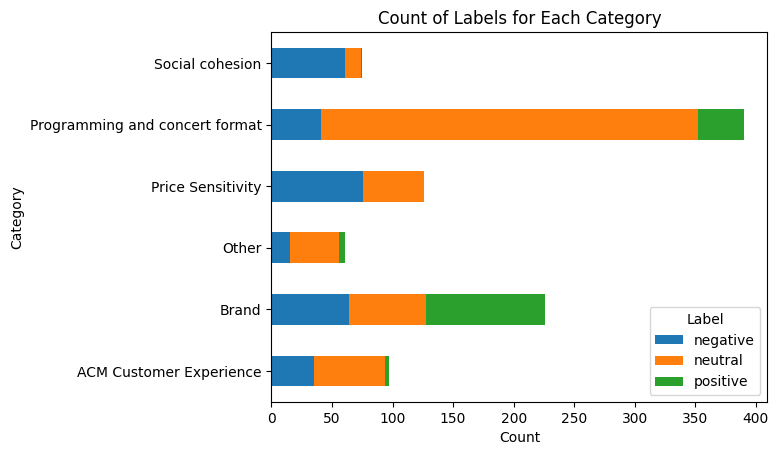

In [ ]:
import matplotlib.pyplot as plt

# Group data by 'category' and 'label', then count occurrences
label_counts = df_survey.groupby(['category', 'label']).size().unstack()

# Plot the count of each label for each category
label_counts.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Count of Labels for Each Category')
plt.legend(title='Label')
plt.show()


In [ ]:
count_df = df_survey.groupby(['category', 'label']).size().unstack(fill_value=0)
count_df
#label_counts.value_counts()

label,negative,neutral,positive
category,,,
ACM Customer Experience,35,59,3
Brand,64,64,98
Other,15,41,5
Price Sensitivity,76,50,0
Programming and concert format,41,311,38
Social cohesion,61,13,1


In [ ]:
sub_df = df_survey.groupby(['Sub/Non-sub', 'label']).size().unstack(fill_value=0)
sub_df

label,negative,neutral,positive
Sub/Non-sub,,,
Non-subscriber,204,354,112
Subscriber,89,186,33


In [ ]:
#non-sub total = 670
#sub total = 308


non_sub_negative = 204/670*100
print('Percentage of Negative Comments from Non-subscribers =', non_sub_negative)

non_sub_positive = 112/670*100
print('Percentage of Positive Comments from Non-subscribers =', non_sub_positive)

non_sub_nuetral = 354/670*100
print('Percentage of Neutral Comments from Non-subscribers =', non_sub_nuetral)

sub_negative = 89/308*100
print('Percentage of Negative Comments from Subscribers =', sub_negative)

sub_positive = 33/308*100
print('Percentage of Positive Comments from Subscribers =', sub_positive)

sub_nuetral = 186/308*100
print('Percentage of Neutral Comments from Subscribers =', sub_nuetral)



Percentage of Negative Comments from Non-subscribers = 30.447761194029848
Percentage of Positive Comments from Non-subscribers = 16.716417910447763
Percentage of Neutral Comments from Non-subscribers = 52.83582089552239
Percentage of Negative Comments from Subscribers = 28.8961038961039
Percentage of Positive Comments from Subscribers = 10.714285714285714
Percentage of Neutral Comments from Subscribers = 60.3896103896104


In [ ]:
data = {
    'Subscriber Type': ['Non-Subscriber', 'Non-Subscriber', 'Non-Subscriber', 'Subscriber', 'Subscriber', 'Subscriber'],
    'Sentiment': ['Negative', 'Positive', 'Neutral', 'Negative', 'Positive', 'Neutral'],
    'Percentage': [non_sub_negative, non_sub_positive, non_sub_nuetral, sub_negative, sub_positive, sub_nuetral]
}

percentage_df = pd.DataFrame(data)
percentage_df


,Subscriber Type,Sentiment,Percentage
0,Non-Subscriber,Negative,30.447761
1,Non-Subscriber,Positive,16.716418
2,Non-Subscriber,Neutral,52.835821
3,Subscriber,Negative,28.896104
4,Subscriber,Positive,10.714286
5,Subscriber,Neutral,60.389610


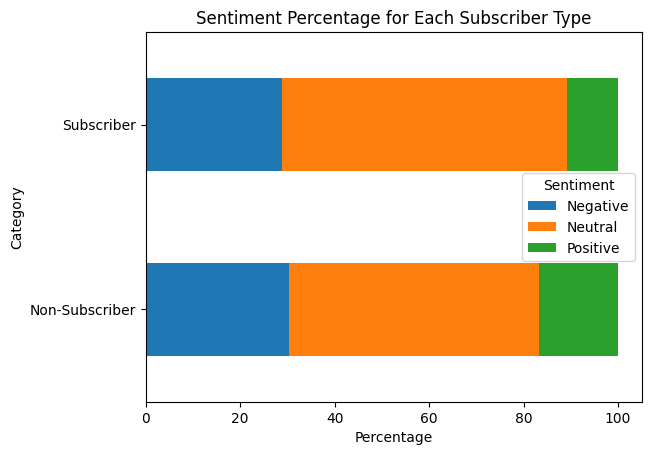

In [ ]:
# Group data by 'Subscriber Type' and 'Sentiment', then count occurrences
sub_counts = percentage_df.groupby(['Subscriber Type', 'Sentiment'])['Percentage'].sum().unstack()

# Plot the count of each label for each category
sub_counts.plot(kind='barh', stacked=True)
plt.xlabel('Percentage')
plt.ylabel('Category')
plt.title('Sentiment Percentage for Each Subscriber Type')
plt.legend(title='Sentiment')
plt.show()


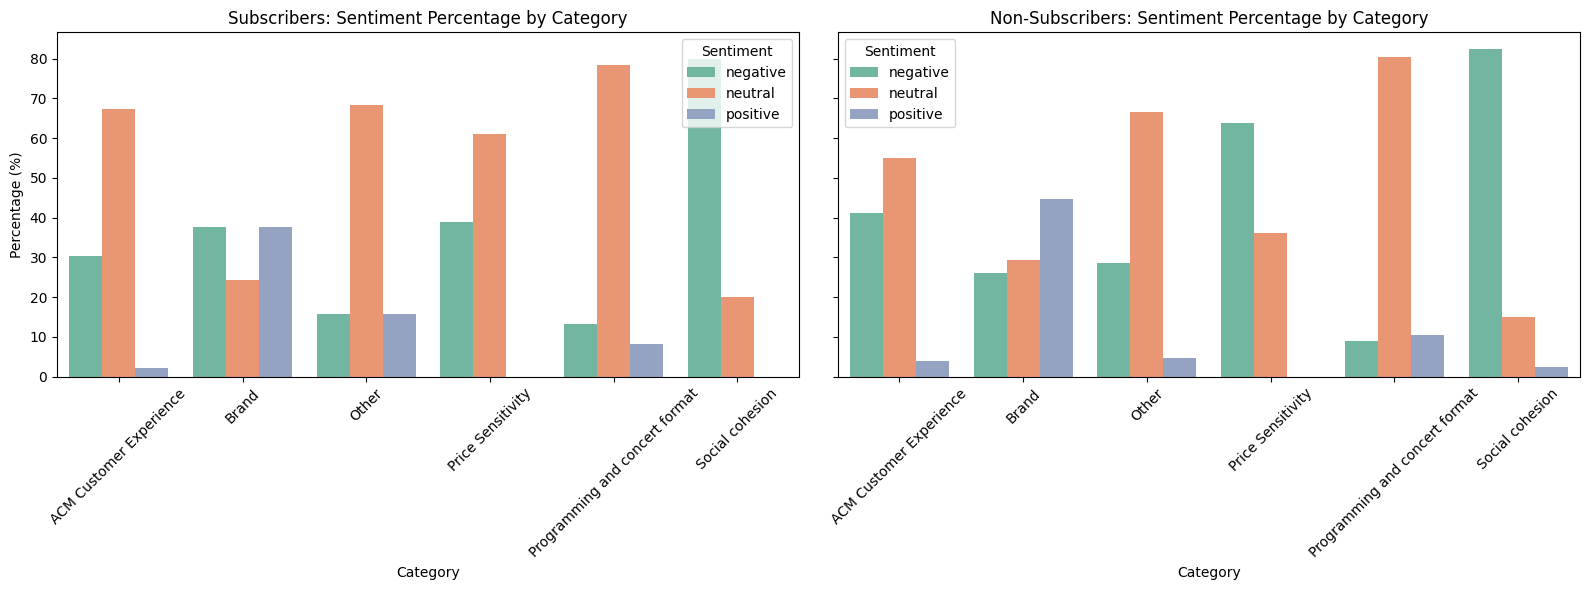

In [ ]:
import seaborn as sns

# Group by 'category', 'Sub/Non-sub', and 'label', then count occurrences
category_counts = df_survey.groupby(['category', 'Sub/Non-sub', 'label']).size().reset_index(name='Count')

# Convert counts to percentages within each 'category' & 'Sub/Non-sub' group
category_counts['Percentage'] = category_counts.groupby(['category', 'Sub/Non-sub'])['Count'].transform(lambda x: x / x.sum() * 100)

# Split data into two subsets
subs = category_counts[category_counts['Sub/Non-sub'] == 'Subscriber']
non_subs = category_counts[category_counts['Sub/Non-sub'] == 'Non-subscriber']

# Set up side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for Subscribers (Percentages)
sns.barplot(data=subs, x='category', y='Percentage', hue='label', palette='Set2', ax=axes[0])
axes[0].set_title('Subscribers: Sentiment Percentage by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Percentage (%)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Sentiment')

# Plot for Non-Subscribers (Percentages)
sns.barplot(data=non_subs, x='category', y='Percentage', hue='label', palette='Set2', ax=axes[1])
axes[1].set_title('Non-Subscribers: Sentiment Percentage by Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Sentiment')

# Adjust layout
plt.tight_layout()
plt.show()




In [ ]:
df_survey.to_csv('/content/survey_w_predictions.csv')

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

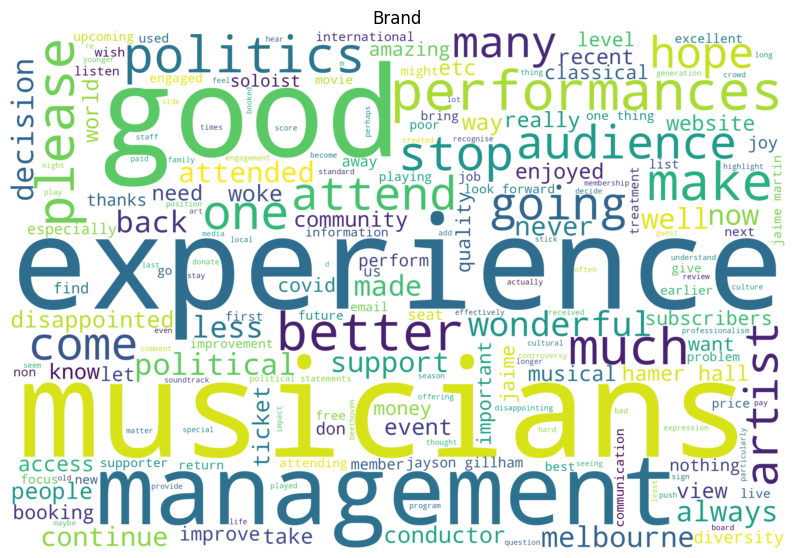

In [ ]:

text = ' '.join(df_survey[df_survey['category'] == 'Brand']['text'].astype(str).tolist())
stopwords = set(STOPWORDS)
stopwords.update(["concert", "mso", "year", "orchestra", "music","concerts","subscription","work","t","love","loved","see","great","enjoy","time","think","years","thank","performance","keep","musician","s","will"])

# Create and generate a word cloud image:
wordcloud = WordCloud(
    width=3000,  # Increase width
    height=2000,  # Increase height
    background_color='white',
    stopwords=stopwords
).generate(text)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Brand")
plt.axis("off")
plt.show()

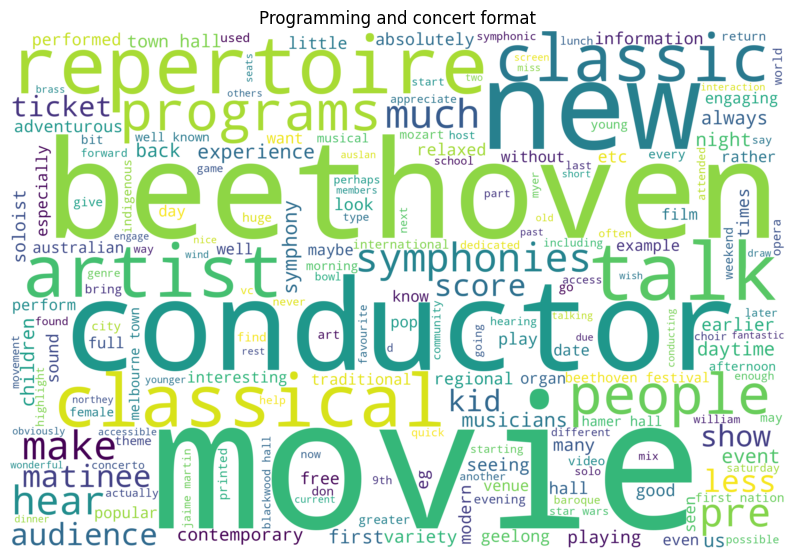

In [ ]:
text = ' '.join(df_survey[df_survey['category'] == 'Programming and concert format']['text'].astype(str).tolist())
stopwords = set(STOPWORDS)
stopwords.update(["concert", "mso", "year", "orchestra", "music","concerts","subscription","work","t","love","loved","see","great","enjoy","time","think","years","thank",
                  "performance","keep","musician","s","will","one","performances","composer","programming","please","really","need","works","live","program","composers","better","piece"
                  ,"series","pieces","programme","attend"])

# Create and generate a word cloud image:
wordcloud = WordCloud(
    width=3000,  # Increase width
    height=2000,  # Increase height
    background_color='white',
    stopwords=stopwords
).generate(text)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Programming and concert format")
plt.axis("off")
plt.show()

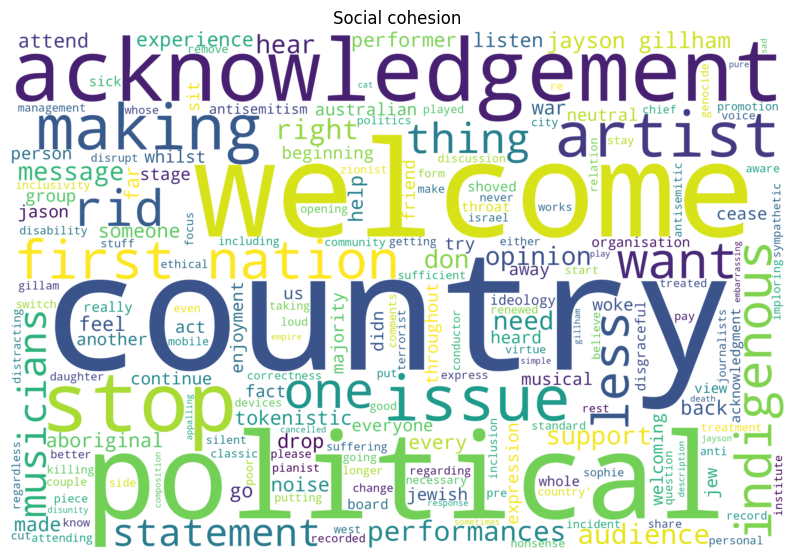

In [ ]:

text = ' '.join(df_survey[df_survey['category'] == 'Social cohesion']['text'].astype(str).tolist())
stopwords = set(STOPWORDS)
stopwords.update(["concert", "mso", "year", "orchestra", "music","concerts","subscription","work","t","love","loved","see","great","enjoy","time","think","years","thank","performance","keep","musician","s","will","people"])

# Create and generate a word cloud image:
wordcloud = WordCloud(
    width=3000,  # Increase width
    height=2000,  # Increase height
    background_color='white',
    stopwords=stopwords
).generate(text)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Social cohesion")
plt.axis("off")
plt.show()

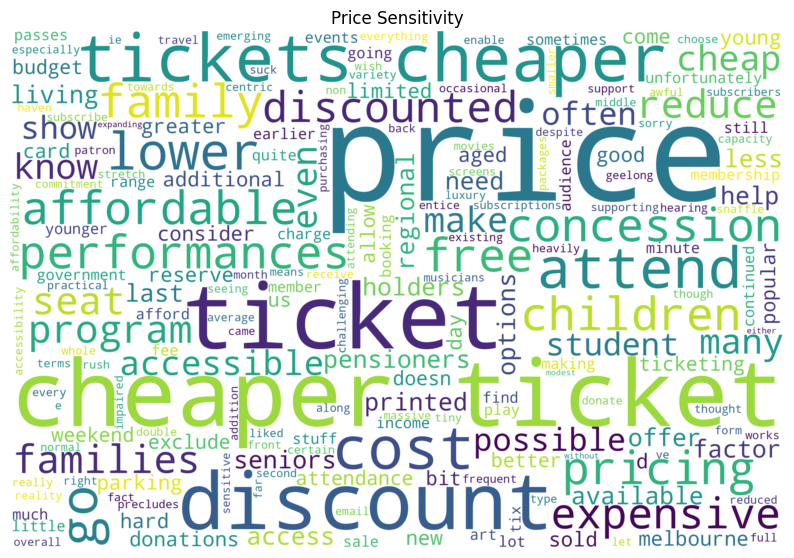

In [ ]:

text = ' '.join(df_survey[df_survey['category'] == 'Price Sensitivity']['text'].astype(str).tolist())
stopwords = set(STOPWORDS)
stopwords.update(["concert", "mso", "year", "orchestra", "music","concerts","subscription","work","t","love","loved","see","great","enjoy","time","think","years","thank","performance","keep","musician","s","will","people"])

# Create and generate a word cloud image:
wordcloud = WordCloud(
    width=3000,  # Increase width
    height=2000,  # Increase height
    background_color='white',
    stopwords=stopwords
).generate(text)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Price Sensitivity")
plt.axis("off")
plt.show()

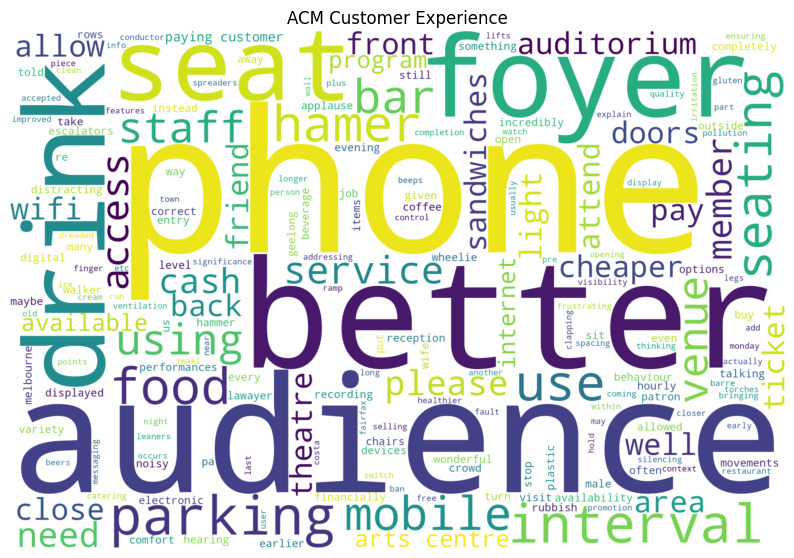

In [ ]:

text = ' '.join(df_survey[df_survey['category'] == 'ACM Customer Experience']['text'].astype(str).tolist())
stopwords = set(STOPWORDS)
stopwords.update(["concert", "mso", "year", "orchestra", "music","concerts","subscription","work","t","love","loved","see","great","enjoy","time","think","years","thank","performance","keep","musician","s","will","people","hall"])

# Create and generate a word cloud image:
wordcloud = WordCloud(
    width=3000,  # Increase width
    height=2000,  # Increase height
    background_color='white',
    stopwords=stopwords
).generate(text)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("ACM Customer Experience")
plt.axis("off")
plt.show()